# Airbnb Listings Bangkok

## Contents

1. [Background](##Background)
1. [Business Problem](#Business-Problem)
1. [Data](#Data)
1. [Data Exploration](#Data-Exploration)
1. [Data Cleaning](#Data-Cleaning)
1. [Analysis](#Analysis)
    - [Number of Listings](#number-of-listings)
    - [Price](#analyzing-price)
    - [Reviews](#analyzing-reviews)
    - [Bookings](#analyzing-bookings)
    - [Hosts](#analyzing-hosts)
1. [Recommendation](#Recommendation)

## Background

According to Airbnb, Bangkok became the most popular destination city for tourists in Thailand, which is also the most visited country in Southeast Asia in 2023. As a major hub for international travelers, the city attracts millions of visitors annually, ranging from backpackers and digital nomads to luxury travelers. Thai government also introduced the Destination Thailand Visa to attract remote workers, digital nomads, and freelancers.

The number of nights reserved in Thailand on Airbnb in 2023 increased by almost 60% year over year as the travel industry continues to flourish. 
In Thailand, group travel by Airbnb visitors surged by nearly 80% in 2023 compared to a 52% increase in solo travel for the same time frame. 
Long-term stays also increased by more than 20% in the first half of 2024.

This rapid growth in Airbnb reservations and the diversity of travelers coming to Bangkok highlight the importance of understanding market trends and optimizing Airbnb’s offerings in the city. By analyzing key factors such as pricing, listing types, and guest preferences, Airbnb can better meet the needs of both hosts and travelers while maximizing revenue potential.

Source: 
- https://curlytales.com/with-60-more-bookings-for-thailand-airbnb-launches-a-creative-guide-to-bangkok/
- https://www.travelandtourworld.com/news/article/thailand-airbnb-bookings-soar-by-30-in-h1-2024-with-explosive-growth-in-group-travel-and-long-term-stays/

## Business Problem

With the increasing number of reservation in Bangkok, Airbnb wants to optimize pricing and enhance guest experiences to strengthen Airbnb's competitive position, therefore increasing its total revenue. Analyzing the characteristics of popular listings—such as their location, room type, and other key attributes—will provide Airbnb with actionable insights on what attracts more bookings. 

**How do different factors such as district, room type, and price affect booking rates and traveler preferences for Airbnb listings in Bangkok?**


## Data 

Before we start our analysis, we will import the modules needed for this project and explore our dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set color palette
airbnb_palette = [
    '#FF5A5F',  # Airbnb Coral (Primary)
    '#FF7F7B',  # Soft Coral
    '#FFA07A',  # Light Coral
    '#FFC1A1',  # Peach Coral
    '#FFD5C2',  # Soft Peach
    '#FFE7D5',  # Light Peach
    '#FFE8E1'   # Very Light Coral
]

sns.set_palette(airbnb_palette)

Below is a description of each columns in the dataset

| Column | Description |
| --- | ---|
|`id ` | Airbnb's unique identifier for the listing. | 
| `name` |  Name of the listing. |
|`host_id` | Airbnb's unique identifier for the host/user. |
|`host_name`| Name of the host. Usually, just the first name(s). |
|`neighborhood` | The neighborhood is geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles. |
|`latitude` | Uses the World Geodetic System (WGS84) projection for latitude and longitude. |
|`longitude` |  Uses the World Geodetic System (WGS84) projection for latitude and longitude. |
|`room_type` | Room types for each homes | 
|`price` | Daily price in local currency. Note, the $ sign may be used despite the locale. |
|`minimum_nights` | The minimum number of night stays for the listing (calendar rules may differ). |
| `number_of_reviews` | The number of reviews the listing has. |
|`last_review` | The date of the last/newest review. |
|`calculated_host_listings_count` | The number of listings the host has in the current scrape in the city/region geography. |
|`availability_365` | avaliability_x. The calendar determines the availability of the listing x days in the future. Note a listing may be available because it has been booked by a guest or blocked by the host. |
|`number_of_reviews_ltm` | The number of reviews the listing has (in the last 12 months). | 

In [3]:
df = pd.read_csv('Airbnb Listings Bangkok.csv')
display(df.head(), df.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


## Data Exploration

In [4]:
df.info()
print()
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

In [5]:
display(df.describe().T, df.describe(include='object'))

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,15854.0,7.926500e+03,4.576800e+03,0.00000,3.963250e+03,7.926500e+03,1.188975e+04,1.585300e+04
id,15854.0,1.579397e+17,2.946015e+17,27934.00000,2.104509e+07,3.503734e+07,5.256154e+07,7.908162e+17
host_id,15854.0,1.541058e+08,1.318726e+08,58920.00000,3.974431e+07,1.224556e+08,2.390547e+08,4.926659e+08
latitude,15854.0,1.374514e+01,4.303957e-02,13.52730,1.372009e+01,1.373849e+01,1.375950e+01,1.395354e+01
longitude,15854.0,1.005599e+02,5.091058e-02,100.32955,1.005297e+02,1.005614e+02,1.005851e+02,1.009234e+02
price,15854.0,3.217704e+03,2.497212e+04,0.00000,9.000000e+02,1.429000e+03,2.429000e+03,1.100000e+06
minimum_nights,15854.0,1.529236e+01,5.081502e+01,1.00000,1.000000e+00,1.000000e+00,7.000000e+00,1.125000e+03
number_of_reviews,15854.0,1.665416e+01,4.061333e+01,0.00000,0.000000e+00,2.000000e+00,1.300000e+01,1.224000e+03
reviews_per_month,10064.0,8.131449e-01,1.090196e+00,0.01000,1.200000e-01,4.350000e-01,1.060000e+00,1.913000e+01
calculated_host_listings_count,15854.0,1.388962e+01,3.026985e+01,1.00000,1.000000e+00,4.000000e+00,1.300000e+01,2.280000e+02


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [6]:
pd.set_option('display.max_colwidth', 1)
# Show unique data in each column
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,15854,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
1,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
2,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel roo

**Displaying Missing Values**

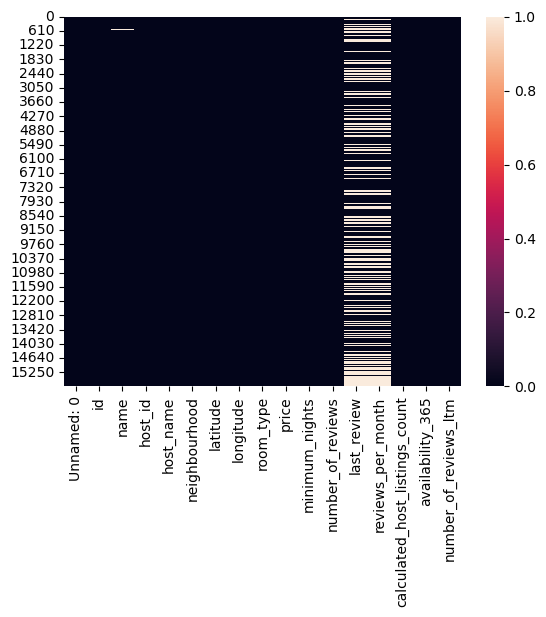

In [7]:
# Create heatmap to display missing values in each column
sns.heatmap(df.isna())
plt.show()

- From the heatmap, we can see that the `last_review` and `reviews_per_month` column have many missing values.

Our next step is to find the amount and proportion of missing values in those columns. We'll also see if there are any other missing values in other columns that may not have been shown on the heatmap because there are only a small amount.

In [8]:
# Sum of Missing Values
missing_sum = df.isna().sum()
# Percentage of Missing Values
missing_pct = round(missing_sum/len(df) * 100, 2)

missing_df = pd.DataFrame({
    'Column': missing_sum.index,
    'Missing Values': missing_sum.values,
    'Missing Percentage': missing_pct.values
}).sort_values(by='Missing Values', ascending=False).reset_index(drop=True)

missing_df

,Column,Missing Values,Missing Percentage
0,reviews_per_month,5790,36.52
1,last_review,5790,36.52
2,name,8,0.05
3,host_name,1,0.01
4,Unnamed: 0,0,0.00
5,minimum_nights,0,0.00
6,availability_365,0,0.00
7,calculated_host_listings_count,0,0.00
8,number_of_reviews,0,0.00
9,room_type,0,0.00


**Missing values result**: 
- Both the `reviews_per_month` and `last_review` have the same amount of missing values so this may indicate that the same rows have missing values for both columns.
- The `reviews_per_month` and `last_review` have 36.52% missing values, we will see whether we can impute the missing values or drop the column.
- The `name` and `host_name` column have very small amount of missing values, we will try to see if we can impute the missing values based on the available data.

## Data Cleaning

Before we start to analyze any missing or wrong values in this dataset, we will drop the `Unnamed: 0` as it is only a copy of the index therefore it is irrelevant for our analysis.

In [9]:
# Remove unnecessary column
df.drop(columns = 'Unnamed: 0', inplace=True)

### Handling Missing Values

**Missing value**: `host_name`<br>
Next we will investigate the missing value in the `host_name` column. As we can see in the previous table for the missing values, there is only one missing value in this column. While we can drop the column, we will try to see if we can fill the value first.

In [10]:
df[df['host_name'].isnull()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


Since this particular host only has 1 listing count as seen in the `calculated_host_listings_count` column, we aren't able to find the `host_name` using the `host_id`. One way of filling the column is to fill it with the `name` value. To do that, we will find if there are other listings where the `host_name` value is the same as the `name` value.

In [11]:
# Find listings where the host_name is the same as the listing name
df[df['host_name'] == df['name']]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
612,4857224,BED STATION Hostel,24987548,BED STATION Hostel,Ratchathewi,13.75183,100.53207,Shared room,450,1,14,2019-09-14,0.14,3,365,0
1875,12855105,Bangkok Check Inn,41115006,Bangkok Check Inn,Bang Rak,13.72122,100.51375,Private room,990,1,1,2017-01-03,0.01,6,333,0
2278,14096705,VM1hostel,84836158,VM1hostel,Phaya Thai,13.77033,100.53773,Shared room,450,1,139,2020-01-01,1.78,1,364,0
5743,28647241,The Art Hostel Bangkok,150411704,The Art Hostel Bangkok,Khlong Toei,13.71408,100.58135,Hotel room,850,1,0,NaN,NaN,2,365,0
5836,28765122,The Art Hostel Bangkok,150411704,The Art Hostel Bangkok,Khlong Toei,13.71341,100.58205,Hotel room,350,1,0,NaN,NaN,2,364,0
8216,35859057,Born Free Hostel,269724000,Born Free Hostel,Phra Nakhon,13.76199,100.50257,Shared room,305,1,1,2019-10-28,0.03,1,0,0
8575,37198913,Catty,279990518,Catty,Khlong Toei,13.72037,100.58079,Entire home/apt,1750,2,0,NaN,NaN,1,180,0
10031,41497435,Rabbitat Hostel,108945430,Rabbitat Hostel,Ratchathewi,13.75369,100.53370,Shared room,990,1,0,NaN,NaN,5,365,0
12321,54357361,Nooch'Garden&House,69325437,Nooch'Garden&House,Taling Chan,13.78348,100.44161,Private room,850,1,0,NaN,NaN,2,365,0


Since there are multiple columns where the `host_name` is the same as the `name` column, we will fill the missing `host_name` value with the `name` value.

In [12]:
# Input name value to missing host_name value
df['host_name'].fillna(df['name'], inplace=True)

In [13]:
# Ensure missing value is 0
df['host_name'].isna().sum()

0

**Missing value**: `name` <br>
Since there are multiple rows where the `name` value is missing our steps to try and fill the missing values are as follows:
1. If `calculated_host_listings_count` > 1, find the rows with the same `host_name` and compare the `name` values. 
2. If `calculated_host_listings_count` = 1, fill the rows with the `host_name` + `room_type`

In [14]:
# Find how many listings each host have
df[df['name'].isnull()][['name', 'host_name' ,'calculated_host_listings_count']]

,name,host_name,calculated_host_listings_count
439,NaN,Titawan,1
544,NaN,Cherry,1
572,NaN,Parichart,1
669,NaN,Chira,1
1030,NaN,Nantida,1
1282,NaN,Diamond Bangkok,1
1594,NaN,Khaneungnit,1
2075,NaN,Pakaphol,3


While most rows only have 1 listing per host, there is one host with more than 1 listings which is Pakaphol. We will find the other listings for that host and if the `name` values are the same for the other listings then we will fill it with that values.

In [15]:
# Find other listings with the host_name Pakaphol
df[df['host_name'] == 'Pakaphol'] 

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaN,NaN,3,1,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [16]:
# Fill name value as Errday Guest House for host Pakaphol
df.loc[2075, 'name'] = 'Erdday Guest House'
df.loc[[2075]]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
2075,13142743,Erdday Guest House,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [17]:
# Input host_name + room_type value to missing name value
df['name'].fillna(df['host_name'] + ' ' + df['room_type'], inplace=True)

In [18]:
# Ensure missing value for name column is 0
df['name'].isna().sum()

0

**Missing value**: `reviews_per_month` <br>

Since the `reviews_per_month` column is related to the `number_of_reviews` column, and the `number_of_reviews` column have no missing values, we will compare these two columns. 


In [19]:
# Find the total number of reviews in the rows with missing values in reviews_per_month column
df[df['reviews_per_month'].isna()]['number_of_reviews'].sum()

0

We calculated the sum of the `number_of_reviews` to see whether any of the rows have a review. Since the total number of reviews is 0, it can be concluded that there are no reviews and the missing values in the `reviews_per_month` column can be filled with 0.

In [20]:
# Fill missing values with 0
df['reviews_per_month'].fillna(0, inplace=True)

# Ensure missing values total is 0
df['reviews_per_month'].isna().sum()

0

**Missing value**: `last_review` <br>

The last column with missing values is the `last_review` column. First, we will see what kind of data is in this column to decide what we will do with the missing values.

In [21]:
df[df['last_review'].isna()].head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,0.0,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,0.0,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,0.0,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.82925,100.56737,Entire home/apt,1461,1,0,NaN,0.0,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.71516,100.56806,Entire home/apt,1400,30,0,NaN,0.0,1,365,0


In [22]:
# Find unique values of column
df['last_review'].value_counts(dropna=False)

last_review
NaN           5790
2022-12-11    189 
2022-12-14    184 
2022-12-13    179 
2022-12-12    172 
             ...  
2015-04-05    1   
2017-08-01    1   
2015-01-01    1   
2020-10-12    1   
2022-05-08    1   
Name: count, Length: 1670, dtype: int64

The data in the `last_review` column are showing the date of the last review. The rows with missing values do not have a date as there have been no review yet for those listings. Since this analysis will not be focusing on the time aspect, the decision to handle the missing values is to drop this column.

In [23]:
# Drop last_review column
df.drop(columns='last_review', inplace=True)

### Handling Duplicated Values

Next, we will check if there are any duplicated values. If there is any, we will drop the duplicated data.

In [24]:
# Find sum of duplicated values
df.duplicated().sum()

0

Since there are no duplicated data, we will proceed to the next step.

### Handling Outliers and Other Anomalies

**Price column**<br>
From the descriptive statistics summary of the data that we have previously done, we saw that the minimum value for the `price` column is 0. This should not be possible as it is not likely the host is listing the location as free. Discount is most likely accounted for during checkout, but the price in the listing usually stays the same. We will check how many data have price = 0 and handle this anomaly based on the number of rows with this condition.

In [25]:
# Find row with price = 0
df[df['price']==0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,0.0,1,0,0


As there is only one row with the price equal to 0, we will impute the data with the mean or median price depending on the price distribution.  To assess the distribution, we will generate a histogram of the price values. Furthermore, we will apply the D’Agostino and Pearson’s test to evaluate the normality of the price data

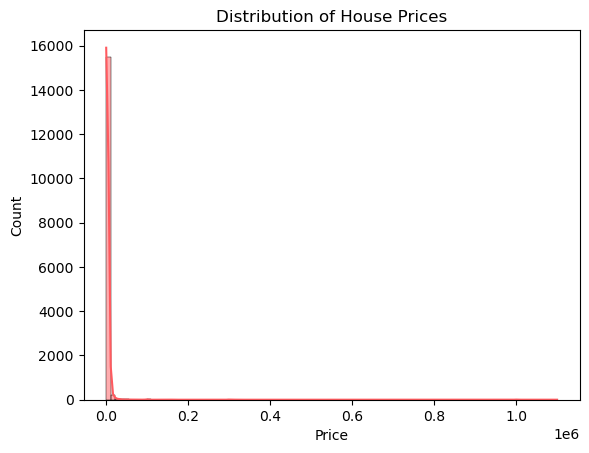

In [ ]:
sns.histplot(data=df, x='price', bins=100, kde=True)
plt.xlabel('Price') 
plt.ylabel('Count')
plt.title('Distribution of House Prices') 
plt.show()

In [27]:
from scipy.stats import normaltest

statistic, p_value = normaltest(df['price'])
alpha = 0.05  # significance level

print(f'D\'Agostino test statistic: {statistic}')
print(f'p-value: {p_value}')

if p_value < alpha:
    print(f'The null hypothesis can be rejected (p < {alpha}). The data is not normally distributed.')
else:
    print(f'The null hypothesis cannot be rejected (p >= {alpha}). The data is normally distributed.')

D'Agostino test statistic: 43049.94444612527
p-value: 0.0
The null hypothesis can be rejected (p < 0.05). The data is not normally distributed.


The results of the D’Agostino and Pearson’s test indicate that our data is not normally distributed, and the accompanying histogram reveals a positive skew. This means that we will use the median to impute our price data. Since the price of a listing may be different based on its location and room type, we will filter the data to find the median of listings located in the same location and having the same room type with our row data.

In [28]:
# Filter Vadhana locations with room type = Hotel room
vadhana_hotel = df[(df['neighbourhood'] == 'Vadhana') & (df['room_type']=='Hotel room')]
# Get median price 
median_price = vadhana_hotel['price'].median()
median_price

2414.0

In [29]:
# Input median price
df.loc[11103, 'price'] = median_price
df.loc[11103]['price']

2414

**Displaying Outliers**

Next, we will look at the outliers in this dataset and decide how to handle them based on the results.

In [30]:
# Find what columns are numericals
df.describe().columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [31]:
numerical_cols = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365','number_of_reviews_ltm']

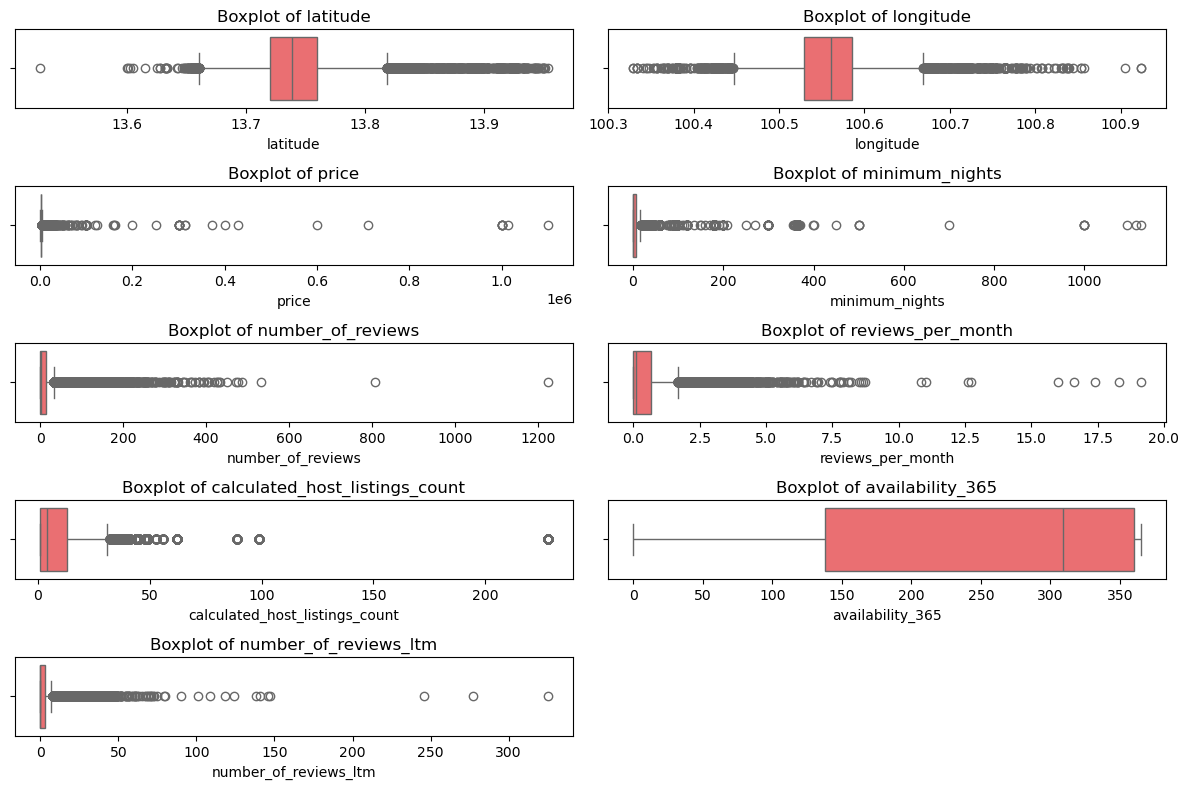

In [32]:
# Displaying boxplot to show outliers
plt.figure(figsize=(12,8))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [33]:
# Outliers in each columns
outliers = []
for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    num_outliers = len(df[(df[col] < lower_bound) | (df[col]>upper_bound)])
    pct_outliers = round(num_outliers / len(df[col]) * 100, 2)
    outliers.append([col, num_outliers, pct_outliers, lower_bound, upper_bound])

# Create DataFrame to show outliers summary
outliers_df = pd.DataFrame(data=outliers, columns=['Column', 'Number of Outliers', 'Percentage of Outliers', 'Lower Bound', 'Upper Bound']).sort_values(by='Number of Outliers', ascending=False).reset_index(drop=True)
outliers_df


,Column,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
0,minimum_nights,3168,19.98,-8.000000,16.000000
1,number_of_reviews,2240,14.13,-19.500000,32.500000
2,number_of_reviews_ltm,2219,14.00,-4.500000,7.500000
3,calculated_host_listings_count,1832,11.56,-17.000000,31.000000
4,reviews_per_month,1471,9.28,-1.005000,1.675000
5,price,1403,8.85,-1393.500000,4722.500000
6,latitude,1095,6.91,13.660979,13.818609
7,longitude,602,3.80,100.446500,100.668340
8,availability_365,0,0.00,-195.000000,693.000000


- The only column with no outliers is `availability_365`.
- The outliers in latitude and longitude columns can be ignored as these are location data.
- `minimum_nights` have the largest number of outliers. The upper bound = 16 means a listing having minimum nights more than 2 weeks will be considered an outliers. Since Airbnb allows long-term rentals, we can include the outlier data as these represent long-term rentals and separate short-term and long-term rentals in our analysis. 
- Many of the columns related to the number of reviews have outliers since there are many listings with no review yet and others having a lot of reviews. We will create a new column to categorize the listings based on the number of reviews as this is an important aspect of our analysis. 
- The `calculated_host_listings_count` have 11% percent of outliers, with the upper bound equal to 31. While most hosts have only 1 or just a few listings, Airbnb allows people who don't own a property to be a host with the consent of the owner. This likely means that owners use an agent to manage their property and some agents are trusted by many owners so they have many listings under their name. For now we will keep the outliers in this column.


**calculated_host_listings**

For this column we will check which host have the most listings and whether the listings are different or not

In [34]:
# Identifying max calculated_host_listings
df[df['calculated_host_listings_count'] == df['calculated_host_listings_count'].max()]['host_name'].unique()


array(['Curry'], dtype=object)

In [35]:
curry = df[df['host_name'] == 'Curry']
curry

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
6473,31029786,Near The Grand Palace/ASOK Station/Sukhumvit#05,201677068,Curry,Khlong Toei,13.735100,100.559190,Entire home/apt,2057,1,60,1.24,228,361,18
6479,30804041,Near The Grand Palace/ASOK Station/Sukhumvit 5mins,201677068,Curry,Khlong Toei,13.733850,100.557140,Entire home/apt,2057,1,76,1.55,228,361,19
6672,31607546,Near The Grand Palace/ASOK Station/Sukhumvit#06,201677068,Curry,Khlong Toei,13.733950,100.558800,Entire home/apt,2057,1,101,2.10,228,361,20
7009,32504596,New! Sukhumvit NANA 1BR Suit near BTS 2PPL,201677068,Curry,Ratchathewi,13.750870,100.555970,Entire home/apt,1466,3,86,1.87,228,356,14
7244,32970026,30days! Sukhumvit NANA spacious 1BR 2PPL near BTS,201677068,Curry,Ratchathewi,13.749710,100.556570,Entire home/apt,1466,3,81,1.78,228,358,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14906,750412362717761633,New!Near The Grand Palace/ASOK Station/4PPL,201677068,Curry,Khlong Toei,13.735637,100.557799,Entire home/apt,3429,1,3,3.00,228,360,3
15336,771365335830828138,30days! AirportLink Sukhumvit NANA MaxValu 2BR(4P),201677068,Curry,Ratchathewi,13.750300,100.555503,Entire home/apt,3994,3,0,0.00,228,340,0
15474,780130696121233047,月租特惠！豪华两卧两卫！Ekkamai BTS/The Emporium/曼谷大学/无边泳池/健身房,201677068,Curry,Khlong Toei,13.718087,100.580706,Entire home/apt,1588,30,0,0.00,228,304,0
15515,777296851892558815,One Siam/Platinum Fashion Mall/Mrt Arl Bts/MBK/GYM,201677068,Curry,Ratchathewi,13.756598,100.540777,Entire home/apt,2000,25,0,0.00,228,348,0


Based on our findings, while there are some rows with similar names we can see they each have different id and the location slightly differs. This could mean that the host have several locations located in the same area or they may have several rooms rented out in the same building. 

**Outliers: `minimum_nights`**

Airbnb allows hosts to rent out their property for long-term stays, targeting digital nomads or traveling professionals, so hosts can set the minimum nights for monthly or even yearly stays. The upper bound for the `minimum_nights` is 16, meaning *long-term rents are considered outliers*. As we want to include long-term rents in our analysis, we will create another column in our DataFrame to categorize listings designated for short-term or long-term rent. We will also *remove any rows with `minimum_nights` longer than 1 year (365 days)*.

In [36]:
# Identifying minimum_nights > 1 year
df[df['minimum_nights']>365]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
61,1041976,Long-stay special rate spacious entire floor Siam,5735895,Pariya,Parthum Wan,13.74814,100.52016,Entire home/apt,2900,1125,295,2.61,3,0,0
324,2489610,NEW 65Sqm 2BD 2BR Sukhumvit26 Emquartier Emporium,12743033,Thanan,Khlong Toei,13.72699,100.56988,Entire home/apt,2043,370,23,0.23,2,365,0
1134,7625178,วิวล่า สิขลา,39999413,อัครพล,Vadhana,13.74159,100.57977,Private room,65000,399,0,0.00,1,365,0
1200,8801560,"30th floor, 10 min to BTS, Seaview",4517723,Kannicha,Bang Na,13.66417,100.64955,Entire home/apt,35000,998,20,0.26,7,365,5
1592,10709131,"34Fl 2, M Ladprao Condo,MRT & Malls",32398198,Touchapon,Chatu Chak,13.81699,100.56292,Entire home/apt,760,700,61,0.73,2,364,0
1833,12046101,Near BTS Onnut Convenience house,22676472,Kuan,Suanluang,13.71161,100.60344,Entire home/apt,1300,500,2,0.02,3,363,0
3694,19893829,2 Bedroom Suite@Kirthana Residence,64131143,Chetna,Vadhana,13.73917,100.56616,Entire home/apt,7286,500,0,0.00,3,48,0
4194,22059876,C,160989331,Annchalee,Thon buri,13.71693,100.48330,Private room,161516,500,3,0.05,1,0,0
7986,35165443,Wonderful apartment for you holiday in Thai,86991723,Yang,Bang Na,13.67260,100.60352,Entire home/apt,2000,1115,0,0.00,2,358,0
8608,37270784,นพกรณ์ แมนชั่น Noppakorn Mansion,271222372,Noppakorn,Lat Phrao,13.81852,100.59248,Entire home/apt,450,450,0,0.00,1,364,0


In [37]:
print(f'Number of listings with minimum nights for more than 1 year: {len(df[df['minimum_nights']>365])}')

Number of listings with minimum nights for more than 1 year: 15


As we can see above, there are listings where the minimum nights is more than 1000. Since there are only 15 rows where the minimum nights are more than 1 year, we will drop these rows.

In [38]:
# Drop rows with minimum nights more than 365
df = df[df['minimum_nights'] <= 365]

**Outliers: `price`**

In [39]:
# Identifying price 
df[df['price']>4722.5].sort_values(by='price', ascending=False)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
12868,635676064543597376,New 1 bedroom apartment BTS MRT Asoke,12464705,Lucio,Vadhana,13.742186,100.560394,Entire home/apt,1100000,14,0,0.00,1,365,0
12300,562972065309061724,3B中文No Guest Service Fee@Nana Asok/Soi11 Nightlife,131427125,Jj,Vadhana,13.746660,100.559100,Entire home/apt,1014758,30,2,0.32,10,75,2
1779,11579635,"2 Bedroom,wifi,5mMRT&Shopping Mall",30803267,Yasmine,Huai Khwang,13.754710,100.565980,Entire home/apt,1000000,100,53,0.64,4,249,0
4620,23740993,"Modern&Luxury apartment,5min to MRT,freeWifi",30803267,Yasmine,Huai Khwang,13.760650,100.568980,Entire home/apt,1000000,1,12,0.22,4,336,0
6289,29909847,BTS轻轨线on nut站，全新一房一厅，临Tesco商场市集!New cozy 1BR,210559448,Cora,Khlong Toei,13.703330,100.592470,Entire home/apt,1000000,2,69,1.39,6,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7270,33102996,10 Person House @ platinum mall Central World BTS,595560,Edmond,Ratchathewi,13.760050,100.542100,Entire home/apt,4744,1,42,0.92,3,332,5
1121,8654051,Bangkok Silom Private Gathering Place # Air3nity,13282564,Inthanom,Bang Rak,13.725300,100.529500,Entire home/apt,4734,1,239,3.28,6,194,15
11386,46347034,"Way of Riverside, Way of Ordinary Life",149900593,Theatre Residence,Bangkok Noi,13.753410,100.487350,Private room,4727,1,0,0.00,4,362,0
5152,25493646,Riverfront Residence Bangkok River view (2BR),100104168,Riverfront,Yan na wa,13.673040,100.544660,Private room,4726,1,0,0.00,2,363,0


- Some of the listings with high prices also have long minimum nights, suggesting that these listings are catered to visitors looking for long-term rentals.  
- The description in the `name` column suggests that some listings have more than 1 room so it makes sense that the price may be higher.
- Airbnb hosts offer various amenities in their property, ranging from basic to luxury amenities so it is plausible for some listings to have high prices.

### Creating Additional Columns

Next we will create additional columns to categorize some of our data.

**`review_category`** <br>
Reviews will be categorized as follows:
- **No review** = 0 reviews
- **Low review** = 1 - 10 reviews
- **Moderate review** = 10 - 100 reviews
- **High review**  >= 100 reviews 

Note that this category is only based on the number of reviews, we do not have the data on the overall ratings of the listings.

In [40]:
def categorize_reviews(reviews):
    if reviews == 0:
        return 'No Review'
    elif 1 < reviews <= 10:
        return 'Low Review'
    elif 10 < reviews <= 100:
        return 'Moderate Review'
    else:
        return 'High Review'
    
df['review_category'] = df['number_of_reviews'].apply(categorize_reviews)

**`duration_type`** <br>
The listings will also be categorized based on the `minimum_nights` column. We will categorize it based on the result of the outliers calculation. Since the upper bound is 16, any listings with a minimum night of more than 16 will be considered as long-term rentals.
- **Short term** : less than or equal to 16 days
- **Long term** : More than 16 days

In [41]:
def categorize_length(length):
    if length <= 16:
        return 'Short term'
    else:
        return 'Long term'
    
df['duration_type'] = df['minimum_nights'].apply(categorize_length)

**`booking_status`**<br>
We will also create a column that describes the booking status of the listing based on the `availability_365` column with these categories:
- **Fully booked** = if availability_365 is equal to 0, which means there are no available days in the next 365 days.
- **No booking** = if availability_365 is equal to 365, which means it is available for the next 365 days.
- **Partial booking** = if availability_365 is larger than 0 but less than 365, meaning it has been booked for some days, but is still available to be booked for other days.

In [42]:
def categorize_booking(booking):
    if booking == 0:
        return 'Fully booked'
    elif booking == 365:
        return 'No booking'
    else:
        return 'Partial booking'
    
df['booking_status'] = df['availability_365'].apply(categorize_booking)

### Fixing Incorrect Names

After some research, there are some typo in the neighbourhood names so we will fix this typo. Also, we will rename the `neighbourhood` column to `district` to better represent the administrative structure of the area.

In [43]:
# Rename neighbourhood to district
df = df.rename(columns = {'neighbourhood' : 'district'})

In [44]:
# Dictionary for district name correction
district_correction  = {
'Bang Kho laen' : 'Bang Kho Laem',
'Chatu Chak' : 'Chatuchak',
'Wang Thong Lang' : 'Wang Thonglang',
'Parthum Wan' : 'Pathum Wan',
'Yan na wa' : 'Yan Nawa',
'Thon buri' : 'Thon Buri',
'Pra Wet' : 'Prawet',
'Suanluang' : 'Suan Luang',
'Thung khru': 'Thung Khru',
'Bang Khun thain' : 'Bang Khun Thian',
'Vadhana' : 'Watthana'}

# Replace to correct values
df['district'] = df['district'].replace(district_correction)
df['district'].unique()

array(['Ratchathewi', 'Bang Na', 'Bang Kapi', 'Din Daeng',
       'Bang Kho Laem', 'Rat Burana', 'Chatuchak', 'Khlong San',
       'Bang Rak', 'Phaya Thai', 'Sathon', 'Khlong Toei', 'Watthana',
       'Sai Mai', 'Lat Krabang', 'Bangkok Yai', 'Wang Thonglang',
       'Huai Khwang', 'Phasi Charoen', 'Bang Sue', 'Nong Chok',
       'Phra Khanong', 'Thawi Watthana', 'Prawet', 'Phra Nakhon',
       'Thon Buri', 'Yan Nawa', 'Suan Luang', 'Don Mueang', 'Dusit',
       'Lak Si', 'Pathum Wan', 'Samphanthawong', 'Bueng Kum',
       'Bang Phlat', 'Saphan Sung', 'Min Buri', 'Khan Na Yao',
       'Khlong Sam Wa', 'Bang Khen', 'Lat Phrao', 'Chom Thong',
       'Bangkok Noi', 'Pom Prap Sattru Phai', 'Nong Khaem', 'Thung Khru',
       'Bang Khae', 'Bang Khun Thian', 'Taling Chan', 'Bang Bon'],
      dtype=object)

### Saving clean dataset

In [45]:
# Saving clean dataset
# df.to_csv('Airbnb Listing Bangkok Clean.csv', index=False)

## Analysis

### Testing Data Normality

Before we start our analysis, we will check the normality of our dataset. The normality test used in this analysis is the **D'Agostino and Pearson's Test**. The significance level used is 0.05.

In [46]:
# Define numerical columns
numerical_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365','number_of_reviews_ltm']

In [47]:
# Normality test
from scipy.stats import normaltest
alpha = 0.05    # significance level
normal_test = []

for col in numerical_cols:
    statistic, p_value = normaltest(df[col])
    if p_value < alpha:
        decision = 'Reject H0'
        distribution = 'Not normally distributed'
    else:
        decision = 'Do not reject H0'
        distribution = 'Normally distributed'
    normal_test.append([col, round(statistic, 3), p_value, decision, distribution])

normal_result = pd.DataFrame(data=normal_test, columns = ['Column', 'Statistic Value', 'P-value', 'Decision', 'Distribution'])
normal_result

,Column,Statistic Value,P-value,Decision,Distribution
0,price,43069.519,0.0,Reject H0,Not normally distributed
1,minimum_nights,17744.705,0.0,Reject H0,Not normally distributed
2,number_of_reviews,19162.495,0.0,Reject H0,Not normally distributed
3,reviews_per_month,15607.572,0.0,Reject H0,Not normally distributed
4,calculated_host_listings_count,16454.811,0.0,Reject H0,Not normally distributed
5,availability_365,12889.089,0.0,Reject H0,Not normally distributed
6,number_of_reviews_ltm,24869.243,0.0,Reject H0,Not normally distributed


- Based on the table above, all the numerical columns have p-value less than 0.05, meaning we have to reject the null hypothesis and all the data is not normally distributed.

### Number of Listings

First, we will look at how the number of listings vary by the **district**, **room type**, and **duration type**.


**By district**

- Is there a large variation in the number of listings between districts?
- Which district(s) are the most popular based on the number of listings?
- Which district(s) have the least amount of listings?

In [48]:
# Count listings by neighbourhood
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['District', 'Listing Count']

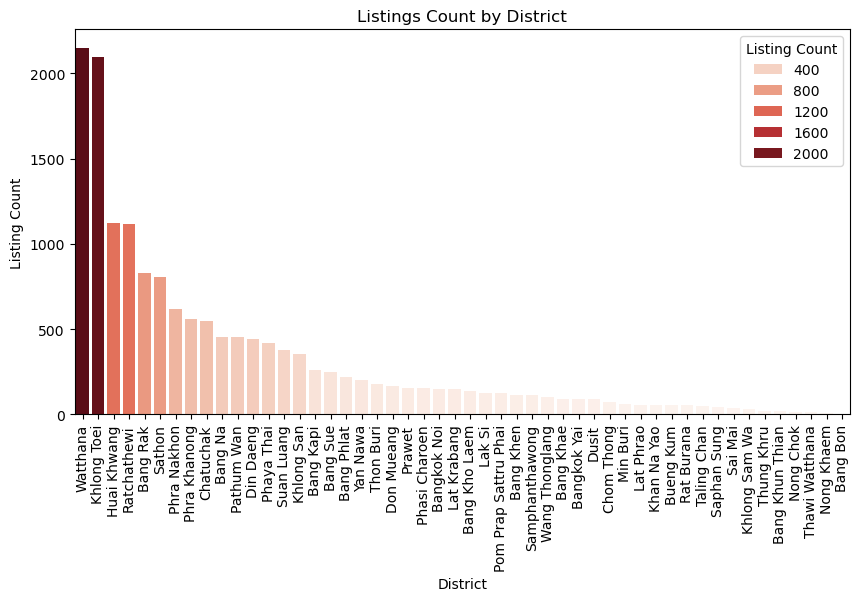

In [49]:
# Create barplot 
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=district_counts, y = 'Listing Count', x='District', hue='Listing Count', palette='Reds')
plt.title('Listings Count by District')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

We will create another graph to better visualize the number of listings in 5 districts with the lowest amount of listing.

In [50]:
# 5 districts with the lowest listings
lowest_listings = district_counts.tail(5)

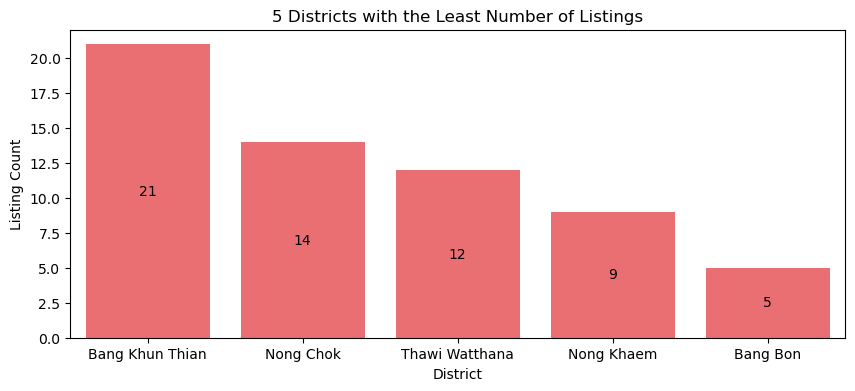

In [51]:
# Create barplot 
plt.figure(figsize=(10, 4))
ax = sns.barplot(data=lowest_listings, y = 'Listing Count', x='District')
plt.title('5 Districts with the Least Number of Listings')
for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.show()

**Findings**:
- The 2 districts that have the most listings are Watthana and Khlong Toei, both having more than 2000 listings. This suggests that these locations have many attractions and have easy access to public transportation.
- Bang Bon, with only 5 listings, is the district with the least amount of listings.
- Only 9 districts have more than 500 listings with a significant decrease between those districts.
- The majority of districts have less than 500 listings and the graph shows a gradual decrease between these districts.

**By Room Type**

- What is the most common room type among the listings?

In [53]:
# Counting listings by room type
room_count = df['room_type'].value_counts().reset_index()
room_count.columns = ['Room Type', 'Listing Count']
room_count

,Room Type,Listing Count
0,Entire home/apt,8902
1,Private room,5765
2,Hotel room,649
3,Shared room,523


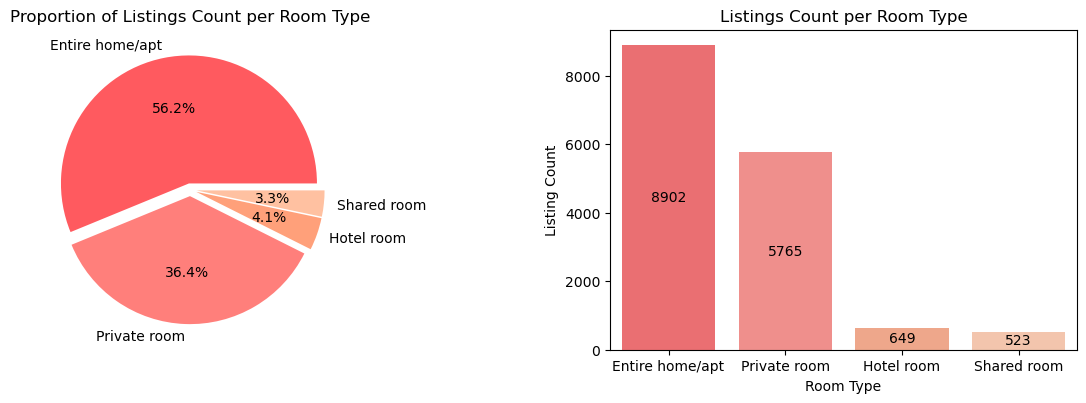

In [54]:
# Create bar plot and pie chart to show the listings counts and proportion

plt.figure(figsize=(14, 4))

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4)

plt.subplot(1,2,1)
plt.pie(room_count['Listing Count'], labels=room_count['Room Type'], autopct='%1.1f%%', explode = [0.05, 0.05, 0.05, 0.05])
plt.title('Proportion of Listings Count per Room Type')

plt.subplot(1,2,2)
bar_plot = sns.barplot(data=room_count, y = 'Listing Count', x='Room Type', hue='Room Type')
plt.title('Listings Count per Room Type')
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='center')

plt.show()

Findings: 
- The room type with the highest demand is entire home/apt as more than 50% of the listings have this room type. This type of room not only offers privacy but also larger space that allows group travelers to stay together in the same place.
- Private room as the second most popular room type also have a large proportion. This room type offers more privacy than shared rooms, but you still have to share some common space with other guests.
- Hotel rooms and shared rooms are not very popular in Airbnb. There may not be as much hotel listings in Airbnb as there are other platforms for booking hotels. Shared rooms offer less privacy so this may not be the most preferred option.

**By neighbourhood and room type**

Next, we want to find out whether the distribution of room types (e.g., entire home, private room, shared room) vary significantly across different districts in Bangkok. We will use **Chi-square test of independence** to find out if the distribution of room types depends on the district.

- **Null Hypothesis (H₀)**: There is no association between district and room type. The distribution of room types is independent of the district.
- **Alternative Hypothesis (H₁)**: There is an association between district and room type. The distribution of room types varies by district. 

In [55]:
# Create cross tabulation of district and room type
district_room = pd.crosstab(df['district'], df['room_type'])
district_room

room_type,Entire home/apt,Hotel room,Private room,Shared room
district,,,,
Bang Bon,2,0,3,0
Bang Kapi,124,1,132,3
Bang Khae,35,1,56,0
Bang Khen,48,3,64,1
Bang Kho Laem,93,2,45,0
Bang Khun Thian,7,0,12,2
Bang Na,276,9,168,3
Bang Phlat,132,3,76,6
Bang Rak,351,67,375,34


In [140]:
from scipy.stats import chi2_contingency

# Chi-square test of independence
stat, pval, dof, expected = chi2_contingency(district_room)

# Display the results
print(f'Chi-square Statistic: {stat:.2f}')
print(f'p-value: {pval:.4f}')

# Interpretation
if pval < 0.05:
    print('Reject H0. There is a statistically significant relationship between district and room type.')
else:
    print('Accept H0. There is no statistically significant relationship between district and room type.')


Chi-square Statistic: 2518.31
p-value: 0.0000
Reject H0. There is a statistically significant relationship between district and room type.


Based on the result of the **Chi-square** test, there is an association between the district and the room type of a listing. Next, we will use heatmap to visualize the count of listings for each category. With a heatmap, we can clearly see the high and low values for each category.

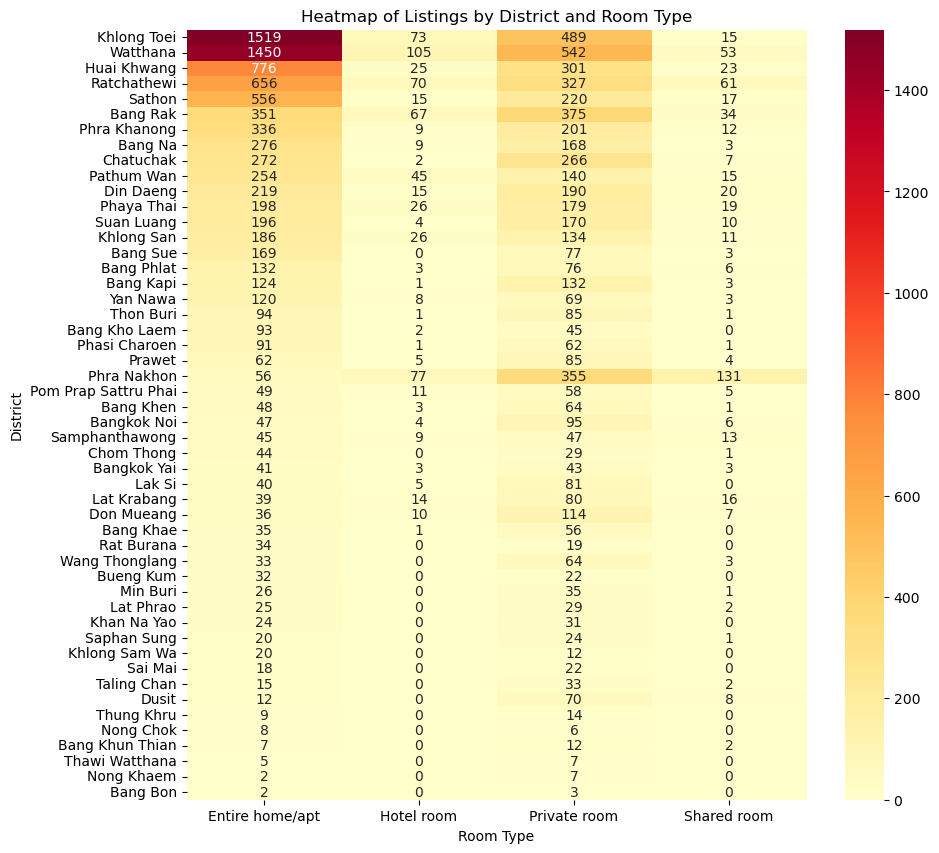

In [ ]:
# Create heatmap to visualize 
plt.figure(figsize=(10, 10))
sns.heatmap(district_room.sort_values(by='Entire home/apt', ascending=False), annot=True, fmt='d', cmap='YlOrRd')
plt.title('Heatmap of Listings by District and Room Type')
plt.xlabel('Room Type')
plt.ylabel('District')
plt.show()


- There is a significant relationship between the location and room  type, suggesting that the number of room type vary by district.
- While for most districts the most common room types are entire homes, some districts have significantly more private rooms such as Phra Nakhon and Don Mueang.
- The district of Phra Nakhon also offers the most shared room, with 131 listings having this room type. This suggests that Phra Nakhon offers many budget options for tourists.

**By duration type**

- How is the proportion between listings for short-term and long-term stay?
- Which types of room are more common for long-term stay?

In [58]:
duration_count = df['duration_type'].value_counts().reset_index()
duration_count


,duration_type,count
0,Short term,12686
1,Long term,3153


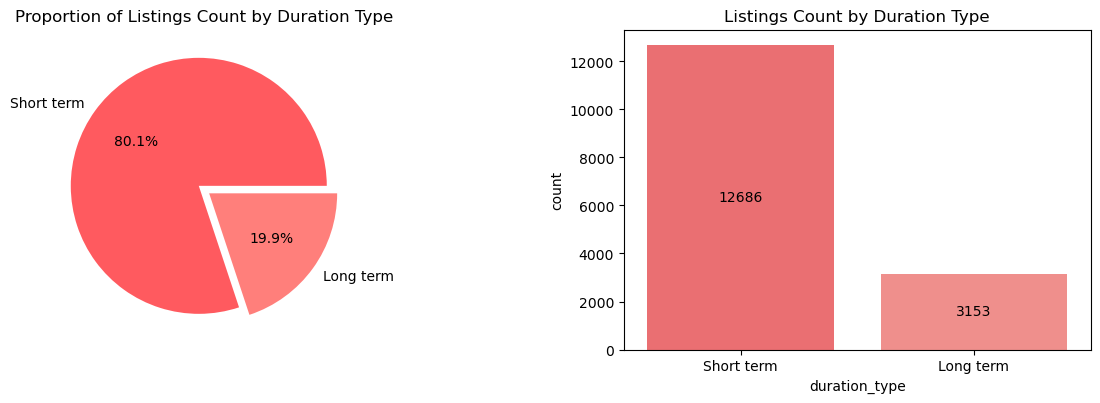

In [59]:
# Create bar plot and pie chart to show the listings counts and proportion
plt.figure(figsize=(14, 4))

# Adjust subplots layout
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4)

# Pie chart
plt.subplot(1,2,1)
plt.pie(duration_count['count'], labels=duration_count['duration_type'], autopct='%1.1f%%', explode = [0.05]*len(duration_count))
plt.title('Proportion of Listings Count by Duration Type')

# Bar chart
plt.subplot(1,2,2)
bar_plot = sns.barplot(data=duration_count, y = 'count', x='duration_type', hue='duration_type')
plt.title('Listings Count by Duration Type')

# Add labels
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='center')

plt.show()

**Duration type and room type**

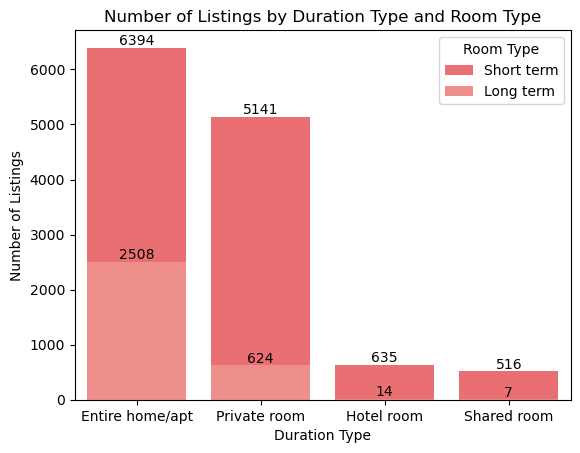

In [60]:
# Stacked bar chart for room type and duration type
fig = sns.countplot(data=df, x='room_type', hue='duration_type', dodge=False)
plt.title('Number of Listings by Duration Type and Room Type')
plt.xlabel('Duration Type')
plt.ylabel('Number of Listings')
plt.legend(title='Room Type')
# Data label
for container in fig.containers:
    fig.bar_label(container, label_type='edge')

plt.show()

Findings: 
- There are only 19.9% listings targeted for long-term stays. With the increase of digital nomads and remote workers coming to Thailand, more Airbnb hosts can list their property for long-term stays to target these segment of visitors.
- The most popular room type for both long-term and short-term stays are entire home/apt as this type of room offers privacy and a lot of space for the guests.



### Analyzing Price


**Correlation between `price` and other numerical columns**

First, we will find the correlation between the numerical columns in this dataset, focusing especially on whether the `price` column is strongly correlated with any other column. The correlation test used is the **Spearman Test** as all the columns do not have a normal distribution.

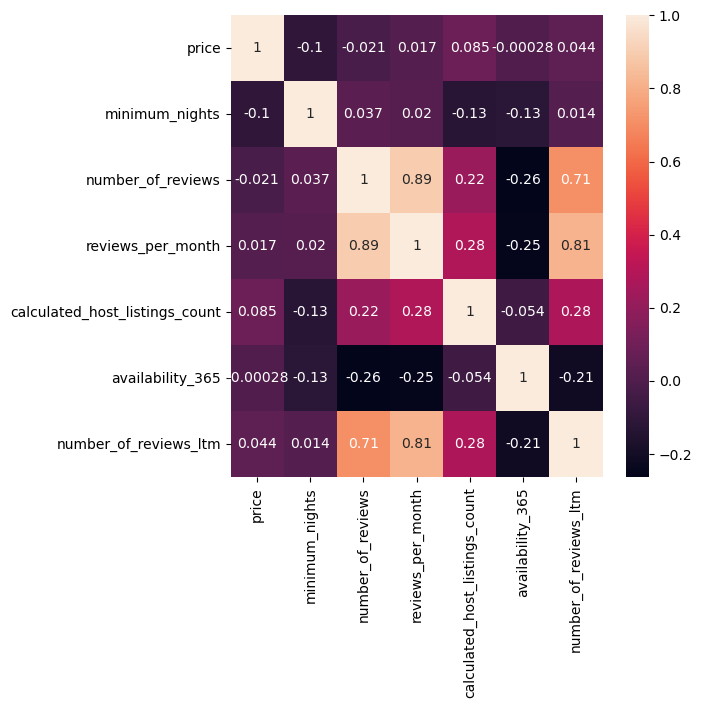

In [61]:
# Use spearman method as data is not normally distributed
corr_data = df[numerical_cols].corr(method = 'spearman')

# Heatmap
plt.figure(figsize=(6,6))
sns.heatmap(corr_data, annot=True)
plt.show()

Correlation Results:
- `Price` is not strongly correlated with any other columns
- The strong correlations are shown between the columns related to the number of reviews:
    - `number_of_reviews` and `reviews_per_month`
    - `number_of_reviews_ltm` and `reviews_per_month`
    - `number_of_reviews` and `number_of_reviews_ltm` 


**Analyzing Price by District**

Next, we want to analyze how the price varies across districts. These are the questions that we need to answer:
- Which districts have the highest average price? Which districts have the lowest average price?
- Does the price vary significantly across districts?

To find out whether the price varies significantly across the districts by conducting a statistical test using the **Kruskal-Wallis** test as our price data is not normally distributed. The following are our hypotheses:

- **Null Hypothesis (H₀)**: The median price is the same across all districts.
- **Alternative Hypothesis (H₁)**: There is a difference in median price across districts.

In [176]:
from scipy.stats import kruskal

district_prices = [prices['price'].values for _, prices in df.groupby('district')]

stat, pval = kruskal(*district_prices)

print('p-value:', pval)

if pval < 0.05:
    print('Reject Ho. There is a significant difference in price between districts.')
else:
    print('Accept Ho. No significant difference in price between districts.')

p-value: 0.0
Reject Ho. There is a significant difference in price between districts.


Next, we will visualize our price data by district.

In [ ]:
# Use median as price data is not normally distributed
district_price = df.groupby('district')['price'].median().reset_index().sort_values(by='price', ascending=False)

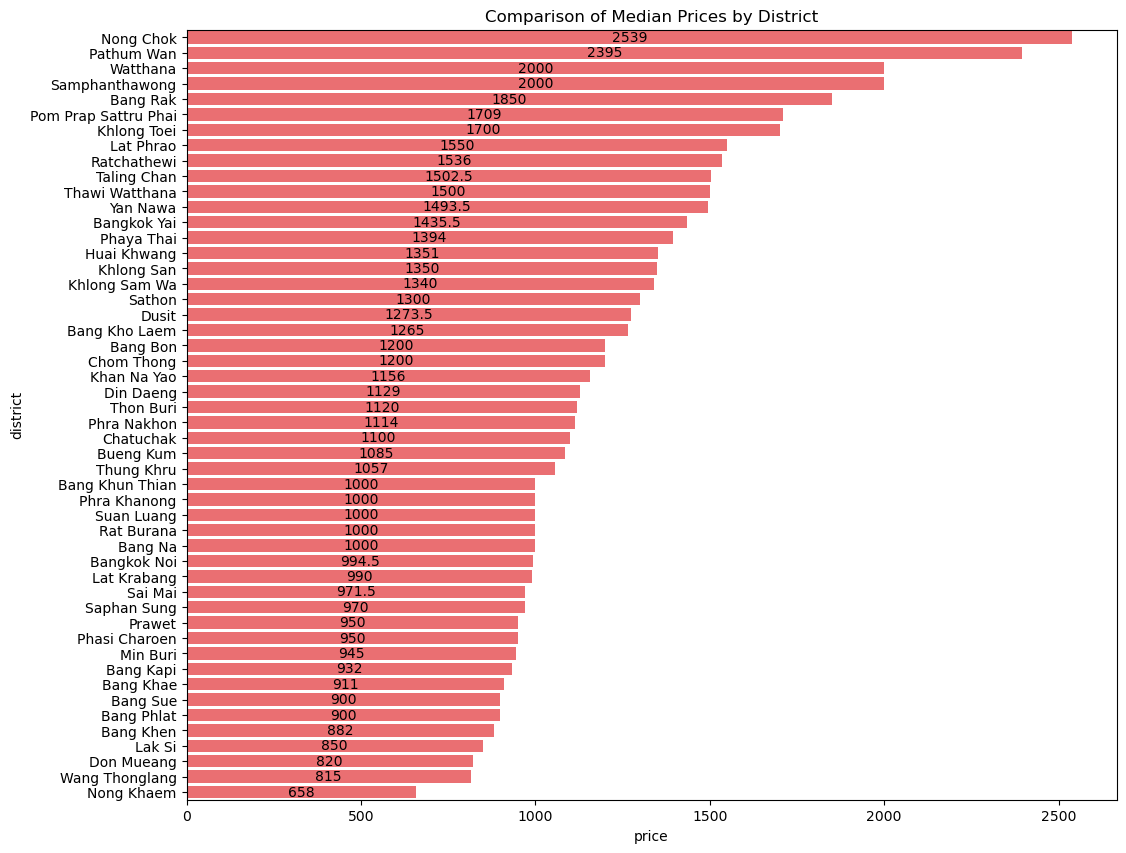

In [ ]:
plt.figure(figsize=(12, 10))
bar_plot = sns.barplot(data=district_price, x='price', y='district')
plt.title('Comparison of Median Prices by District')
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='center')
plt.show()

Findings:
- Nong Chok is the district with the highest median price at 2539 Baht.
- 4 Listings have a median price of over 2000 Baht meaning these locations have very high demand.
- The difference between the highest and lowest median prices is very significant, with the highest median price almost 4 times larger than the lowest in Nong Khaem. 



**Analyzing Price by Room Type**

- Is there a difference in the average prices between room types?
- Which type of room has the highest price?

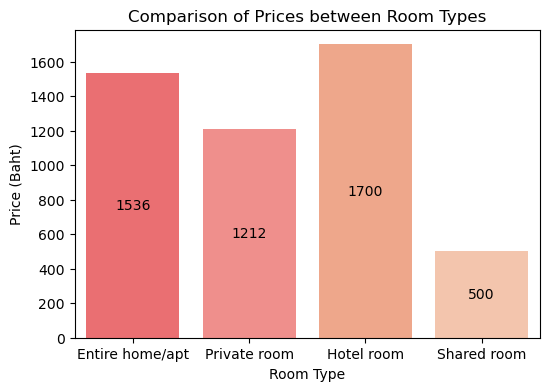

In [66]:
plt.figure(figsize=(6,4))
bar_plot = sns.barplot(data = df, x = 'room_type', y = 'price', estimator = 'median', errorbar=None, hue = 'room_type')
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='center')
plt.title('Comparison of Prices between Room Types')
plt.xlabel('Room Type')
plt.ylabel('Price (Baht)')
plt.show()

Based on our bar plot comparing price between room types, there is a significant difference in the median prices. We will confirm our finding using the Kruskal-Wallis test.

The following are our hypotheses:

- **Null Hypothesis (H₀)**: The median price is the same across all room types.
- **Alternative Hypothesis (H₁)**: There is a difference in median price across all room types.

In [152]:
from scipy.stats import kruskal

stat, pval = kruskal(
    df[df['room_type'] == 'Entire home/apt']['price'],
    df[df['room_type'] == 'Private room']['price'],
    df[df['room_type'] == 'Hotel room']['price'],
    df[df['room_type'] == 'Shared room']['price'],
)

print('p-value:', pval)

if pval < 0.05:
    print('Reject Ho. There is a significant difference in price between room types.')
else:
    print('Accept Ho. No significant difference in price between room types.')

p-value: 3.448538867534078e-258
Reject Ho. There is a significant difference in price between room types.


Findings:
- From the result of the Kruskal Wallis test we find out that there is a significant difference in price between room types, which can be confirmed by the bar graph.
- Hotels have the highest median price, which is reasonable as hotels offers wide range of amenities and services, such as on-site dining, fitness centers, and concierge services, which enhance the overall guest experience. 
- Shared rooms are by far the most economical choice, costing less than half of the next option, private rooms. While shared accommodations provide minimal privacy, they are ideal for budget-conscious travelers or those seeking a brief stay as they prioritize exploration and adventure over their place of stay.

**Analyzing Price by Duration Type**

- Is there a significant difference in price for short-term listings compared to long-term listings?

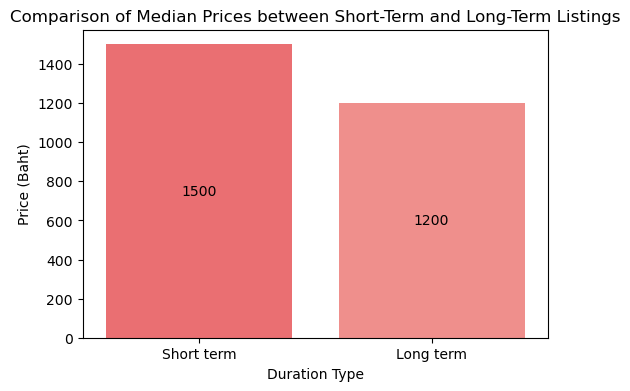

In [68]:
plt.figure(figsize=(6,4))
bar_plot = sns.barplot(data = df, x = 'duration_type', y = 'price', estimator = 'median', errorbar=None, hue = 'duration_type')
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='center')
plt.title('Comparison of Median Prices between Short-Term and Long-Term Listings')
plt.xlabel('Duration Type')
plt.ylabel('Price (Baht)')
plt.show()

In [153]:
stat, pval = kruskal(
    df[df['duration_type'] == 'Short term']['price'],
    df[df['duration_type'] == 'Long term']['price']
)

print('p-value:', pval)

if pval < 0.05:
    print('Reject H0. There is a significant difference in price between duration types.')
else:
    print('Accept H0. No significant difference in price between duration types.')

p-value: 1.0321800980745856e-51
Reject H0. There is a significant difference in price between duration types.


Findings:
- There is a significant difference in price for short-term and long-term listings. The median price of short-term listings is 300 Baht higher than that of long-term listings. This is reasonable as hosts tend to give discounts for long-term listings as this provides them consistent income for an extended period of time.


### Analyzing Reviews

In this part of our analysis we will analyze the number of reviews of each listings by their category:
- **No review** = 0 reviews
- **Low review** = 1 - 10 reviews
- **Moderate review** = 10 - 100 reviews
- **High review**  >= 100 reviews 

First, we want to find out **what is the proportion of listings based on the review category?**

In [70]:
review_count = df.value_counts('review_category').reset_index()
review_count

,review_category,count
0,No Review,5782
1,Low Review,3852
2,Moderate Review,3844
3,High Review,2361


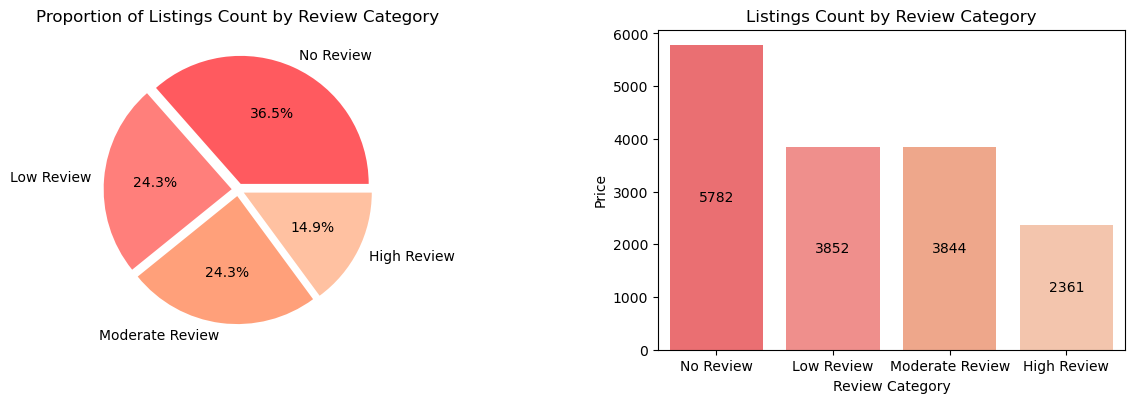

In [71]:
# Create bar plot and pie chart to show the review count and proportion
plt.figure(figsize=(14, 4))

# Adjust subplots layout
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4)

# Pie chart
plt.subplot(1,2,1)
plt.pie(review_count['count'], labels=review_count['review_category'], autopct='%1.1f%%', explode = [0.05]*len(review_count))
plt.title('Proportion of Listings Count by Review Category')

# Bar chart
plt.subplot(1,2,2)
bar_plot = sns.barplot(data=review_count, y = 'count', x='review_category', hue='review_category')
plt.title('Listings Count by Review Category')
plt.xlabel('Review Category')
plt.ylabel('Price')

# Add labels
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='center')

plt.show()

Findings:

The majority of the listings have been reviewed, but only 14.9% have high reviews (more than 100). The number of listings that have low or moderate reviews are pretty similar, with both categories combined making up almost half of the listings. There is a large number of listings with no reviews, which could mean that these listings are new, have never been booked, or guest have not left any reviews yet. 

**Number of Reviews based on Duration Types**

Next, we want to find out if there is a different amount of reviews based on the duration types. As there are more short-term listings in the dataset, we will compare the amount of reviews based on the proportion of each duration types.
- Does the number of reviews differ based on the duration types?

In [72]:
short_review = df[df['duration_type']=='Short term'].value_counts('review_category').reset_index()
long_review = df[df['duration_type']=='Long term'].value_counts('review_category').reset_index()

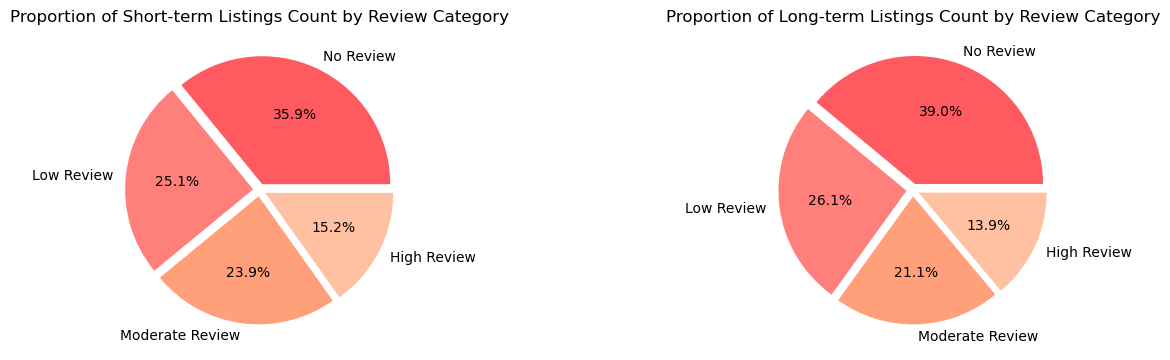

In [73]:
# Set labels
labels = ['No Review', 'Low Review', 'Moderate Review', 'High Review']

# Pie chart to show proportion
plt.figure(figsize=(14, 4))

# Adjust subplots layout
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4)

# Short term reviews pie chart
plt.subplot(1,2,1)
plt.pie(short_review['count'], labels=labels, autopct='%1.1f%%', explode = [0.05]*len(short_review))
plt.title('Proportion of Short-term Listings Count by Review Category')

# Long term reviews pie chart
plt.subplot(1,2,2)
plt.pie(long_review['count'], labels=labels, autopct='%1.1f%%', explode = [0.05]*len(long_review))
plt.title('Proportion of Long-term Listings Count by Review Category')

plt.show()

**Findings**:

- The proportions of the listings are relatively similar between short and long-term rentals based on the review category. 
- Long-term listings have more listings with zero or low reviews compared to short-term listings. This is plausible as there is less guest turnover in long-term listings so there is less people giving reviews. There is also a possibility that there are guests still staying in the listing so they may not have given their review yet.

**Districts with the Most Reviews**

Next, we want to see which districts have the most total number reviews.

In [74]:
# Top 10 districts with the most total number of reviews
# Group by district and sort from most reviews
district_reviews = df.groupby('district')['number_of_reviews'].sum().sort_values(ascending=False).reset_index()
top_district_reviews = district_reviews.head(10)

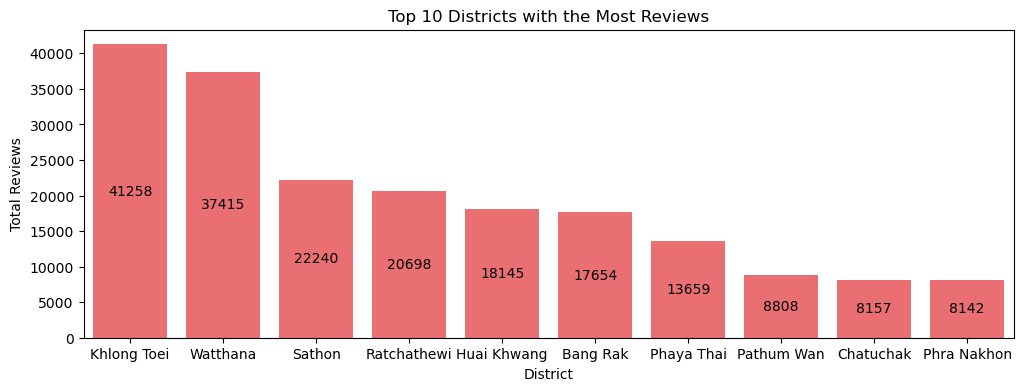

In [75]:
# Bar plot 
plt.figure(figsize=(12, 4))
bar_plot = sns.barplot(data = top_district_reviews, x = 'district', y = 'number_of_reviews')
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='center')
plt.title('Top 10 Districts with the Most Reviews')
plt.xlabel('District')
plt.ylabel('Total Reviews')
plt.show()

**Districts with the Most Listings with No Reviews**

From our previous findings, 36.5% of the listings do not have a review. We want to see which districts have the most number of listings with no reviews.

In [76]:
# Top 10 districts with most listings with no reviews
district_no_reviews = df[df['review_category'] == 'No Review'].value_counts('district').reset_index().head(10)

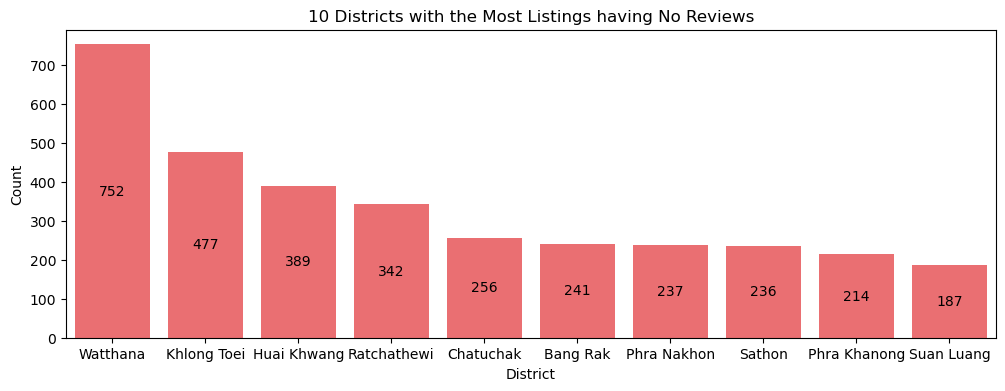

In [77]:
# Bar plot 
plt.figure(figsize=(12, 4))
bar_plot = sns.barplot(data = district_no_reviews, x = 'district', y = 'count')
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='center')
plt.title('10 Districts with the Most Listings having No Reviews')
plt.xlabel('District')
plt.ylabel('Count')
plt.show()

**Analyzing Reviews by Room Type**

Previously, we found out that different districts have different amount of reviews. Next, want to find out whether there is an association between room types and review category . We will use the Chi-Squared test as we are using to use a contingency table of the `district` and `review_category` to analyze the difference in reviews.

In [133]:
# Create cross tabulation
review_rooms = pd.crosstab(df['room_type'], df['review_category'])

In [146]:
from scipy.stats import chi2_contingency

# Chi-square test of independence
stat, pval, dof, expected = chi2_contingency(review_rooms)

# Display the results
print(f'Chi-square Statistic: {stat:.2f}')
print(f'p-value: {pval:.4f}')

# Interpretation
if pval < 0.05:
    print('Reject H0. There is a statistically significant relationship between room type and reviews.')
else:
    print('Accept H0. There is no statistically significant relationship between room type and reviews.')

Chi-square Statistic: 1291.34
p-value: 0.0000
Reject H0. There is a statistically significant relationship between room type and reviews.


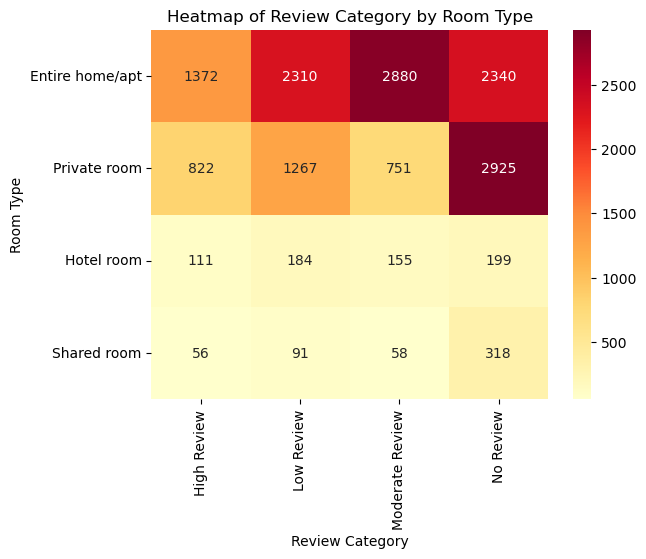

In [135]:
sns.heatmap(review_rooms.sort_values(by='Moderate Review', ascending=False), annot=True, fmt='d', cmap='YlOrRd')
plt.title('Heatmap of Review Category by Room Type')
plt.xlabel('Review Category')
plt.ylabel('Room Type')
plt.show()


Findings:
- Many districts with the most reviews also have many listings with no reviews, suggesting that these districts have a high amount of listings so the variation in reviews are large. 
- Watthana and Khlong Toei are the top two districts with the most amount reviews, but also the two districts that have the most amount of listings with no reviews. This means that while they have many popular listings, there are many listings that are still unknown to travelers.
- From our Chi-Squared test, we can confirm that the number of reviews are affected by the district.


**Analyzing Reviews by Price**

Next, we want to find out whether the price impacts the number of reviews. We will conduct a statistical test using the Kruskal Wallis test as the price data is not normally distributed.

- **Null Hypothesis (H₀**): There is no significant difference in price across different review categories. 
- **Alternative Hypothesis (H₁)**: There is a significant difference in price across different review categories. 

In [147]:
stat, pval = kruskal(
    df[df['review_category'] == 'No Review']['price'],
    df[df['review_category'] == 'Low Review']['price'],
    df[df['review_category'] == 'Moderate Review']['price'],
    df[df['review_category'] == 'High Review']['price']
)

print('p-value:', pval)

if pval < 0.05:
    print('Reject H0. There is a significant difference in price across different review categories.')
else:
    print('Accept H0. No significant difference in price across different review categories.')

p-value: 1.8022209127200317e-14
Reject H0. There is a significant difference in price across different review categories.


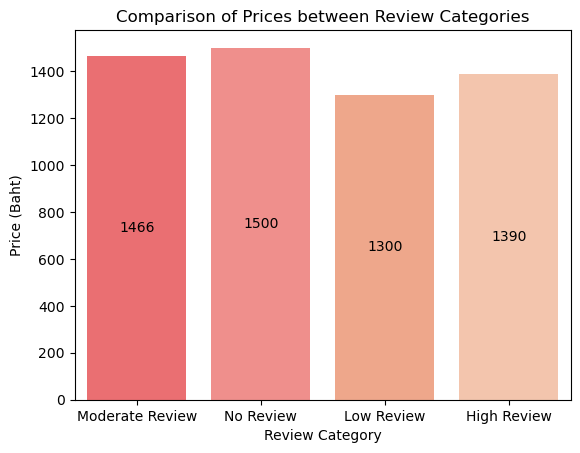

In [79]:
bar_plot = sns.barplot(data = df, x = 'review_category', y = 'price', estimator = 'median', errorbar=None, hue = 'review_category')
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='center')
plt.title('Comparison of Prices between Review Categories')
plt.xlabel('Review Category')
plt.ylabel('Price (Baht)')
plt.show()

Findings:
- Price does significantly affect the number of reviews. Listings with no reviews have a higher median price compared to listings that have been reviewed.
- While listings with the lowest median price have low reviews, one plausible reason is that the majority of these listings are long-term listings as they have lower median price and lower number of guests.

**Comparing Total and Recent Reviews**

While the `number_of_reviews` column tells us the total number of reviews for each listing, the `number_of_reviews_ltm` column describes how many reviews the listing have in the last 1 year.

In [ ]:
# Get sum of total reviews and recent reviews 
total_reviews = df['number_of_reviews'].sum()
recent_reviews = df['number_of_reviews_ltm'].sum()

review_data = {
    'Total Reviews': total_reviews,
    'Recent Reviews (Last 12 Months)': recent_reviews
}

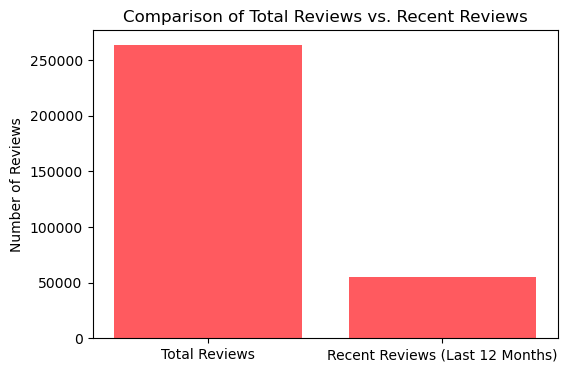

In [81]:
# Plotting the bar chart
plt.figure(figsize=(6,4))
plt.bar(review_data.keys(), review_data.values())
plt.title('Comparison of Total Reviews vs. Recent Reviews')
plt.ylabel('Number of Reviews')
plt.show()

In [122]:
pct_recent_review = round(recent_reviews/total_reviews * 100, 2)
print(f'Percentage of Recent Reviews: {pct_recent_review}')

Percentage of Recent Reviews: 20.94


While there are a total of more than 250000 reviews for all listings in Airbnb Bangkok, there are only 50000 reviews that have been posted in the last 1 year. If there have been bookings that are not reviewed, then this can impact the future performance of a listing as reviews give insight of the overall experience to potential customers, often playing a role in their decision to book a listing. 

### Analyzing Bookings

**Proportion of Listings by Booking Status**

In [82]:
# Count of listings based on booking status
booking_count = df.value_counts('booking_status').sort_values().reset_index()
booking_count

,booking_status,count
0,Fully booked,855
1,No booking,2388
2,Partial booking,12596


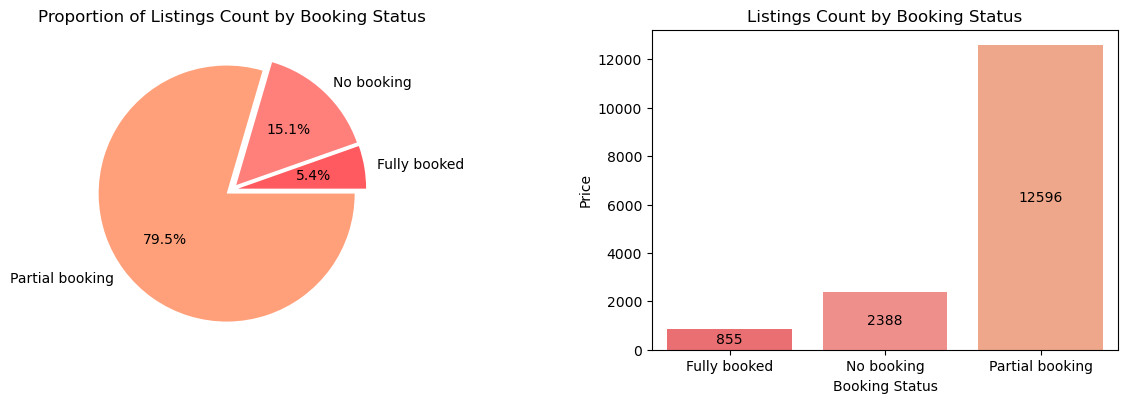

In [83]:
# Create bar plot and pie chart to show the booking count and proportion
plt.figure(figsize=(14, 4))

# Adjust subplots layout
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4)

# Pie chart
plt.subplot(1,2,1)
plt.pie(booking_count['count'], labels=booking_count['booking_status'], autopct='%1.1f%%', explode = [0.05]*len(booking_count))
plt.title('Proportion of Listings Count by Booking Status')

# Bar chart
plt.subplot(1,2,2)
bar_plot = sns.barplot(data=booking_count, y = 'count', x='booking_status', hue='booking_status')
plt.title('Listings Count by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Price')

# Add labels
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='center')

plt.show()

Findings:
- Almost 80% of listings are partially booked, meaning that these listings have active bookings in the next 1 year. 
- While only 5% of listings are fully booked, it is likely that these listings are booked by travelers looking for long-term rentals. This means that there is a demand for long term listings in Bangkok.
- 15.1% of listings do not have any booking yet. While this is only a small portion, we need to find a strategy to promote these listings to attract guests.


**10 Most Booked Districts**

Next, we want to see which are the top 10 booked districts.

In [115]:
top_booked = df[df['availability_365'] != 365].value_counts('district').reset_index().head(10)


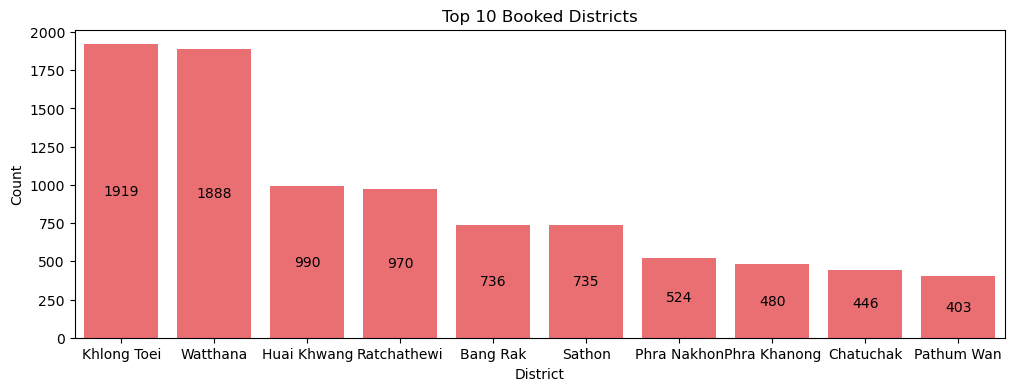

In [117]:
# Bar plot 
plt.figure(figsize=(12, 4))
bar_plot = sns.barplot(data = top_booked, x = 'district', y = 'count')
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='center')
plt.title('Top 10 Booked Districts')
plt.xlabel('District')
plt.ylabel('Count')
plt.show()

**Districts with Most Listings having No Bookings**


In [84]:
district_no_bookings = df[df['booking_status'] == 'No booking'].value_counts('district').reset_index().head(10)

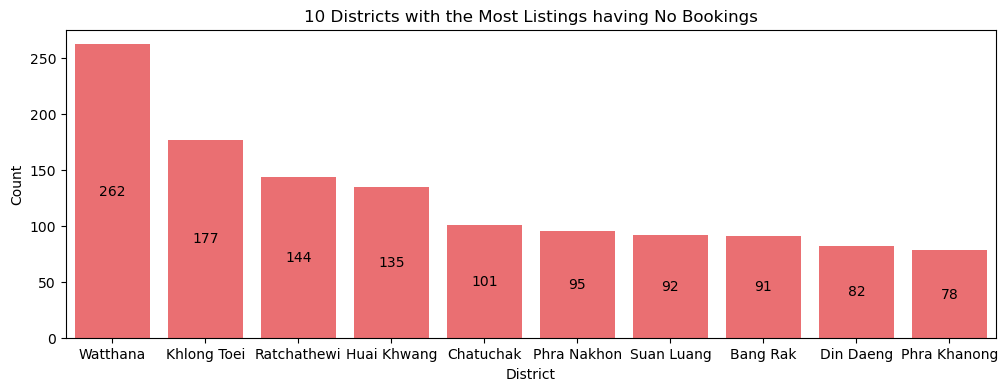

In [85]:
# Bar plot 
plt.figure(figsize=(12, 4))
bar_plot = sns.barplot(data = district_no_bookings, x = 'district', y = 'count')
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='center')
plt.title('10 Districts with the Most Listings having No Bookings')
plt.xlabel('District')
plt.ylabel('Count')
plt.show()

- Some of the districts that have the most bookings also have the most listings that aren't booked. This may be because these districts are also the districts that have the most total listings so there are some listings that are still not well known. Airbnb can help the hosts of these listings to create a targeted ad to help reach potential customers.

**Percentage of Listings with No Bookings per District**

From our previous findings, the districts that have the most no booking status are also the districts that have the most bookings, this is because these districts are the top districts in listing numbers. In this part, we want to see which districts have the highest percentage of no bookings compared to their total listings.

In [86]:
# Create df copy to mark listings with no booking
df1 = df.copy()
df1['no_booking'] = df1['booking_status'] == 'No booking'

# Group by district and calculate total listings and count of no bookings per district
district_booking_summary = df1.groupby('district').agg(
    total_listings=('district', 'size'),
    no_booking_count=('no_booking', 'sum')
)

# Calculate percentage of no booking
district_booking_summary['no_booking_percentage'] = round((district_booking_summary['no_booking_count'] / district_booking_summary['total_listings']) * 100, 2)
district_booking_summary = district_booking_summary.sort_values(by='no_booking_percentage', ascending=False)


In [87]:
# Top 10 districts with highest no book percentage
most_no_book = district_booking_summary.head(10)

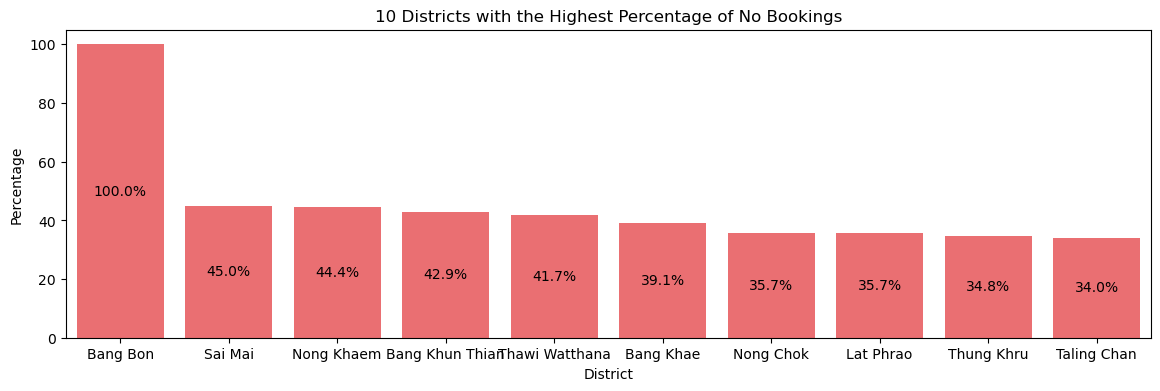

In [88]:
plt.figure(figsize = (14,4))
bar_plot = sns.barplot(data=most_no_book, x = 'district', y = 'no_booking_percentage')
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='center', fmt='%.1f%%')
plt.title('10 Districts with the Highest Percentage of No Bookings')
plt.xlabel('District')
plt.ylabel('Percentage')
plt.show()

In [118]:
df[df['district'] == 'Bang Bon']

,id,name,host_id,host_name,district,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,review_category,duration_type,booking_status
5787,28705837,อพาร์ทเมนต์วันหยุดแสนสบายและสะดวกสบาย,216540015,Paris,Bang Bon,13.67680,100.42566,Private room,2632,1,0,0.00,1,365,0,No Review,Short term,No booking
8592,37266430,wonderful room 5G 好房清洁 可住 特价 Book now don't Miss,169629900,Bob,Bang Bon,13.64895,100.40523,Entire home/apt,1200,14,1,0.03,2,365,0,High Review,Short term,No booking
10026,41248134,ดีมากแมนชั่น DEE MAK MANSION,323193993,Pichayatida,Bang Bon,13.65174,100.35671,Private room,790,1,0,0.00,1,365,0,No Review,Short term,No booking
10037,41512386,Nature & Nature,230586918,Bamrung,Bang Bon,13.65380,100.36371,Entire home/apt,2000,1,0,0.00,1,365,0,No Review,Short term,No booking
14152,720788669348042838,แอร์ พร้อม เฟอร์นิเจอร์ ห้องน้ำส่วนตัว ระเบียง ซัก,10818016,Noolek,Bang Bon,13.65047,100.37097,Private room,900,1,0,0.00,1,365,0,No Review,Short term,No booking


Findings:
- Bang Bon is the only district that have 100% of their listings not booked. The room type offered are entire home/apt and private room, which are the most popular room type in Airbnb Bangkok. While some of their price are affordable, some of the host can adjust their price better to suit the location. If they are offering various facilities in their property, they should highlight this to attract guests. Also, since some of their names are in Thai, they should also add an English translation to attract international guests.
- For other districts, the listings with no bookings are just under 50%. While these areas may be further from the Bangkok central, hosts can add description to highlight local spots near their property to attract guests, particularly long-term ones. 


**Number of Listings by Room Type and Booking Status**

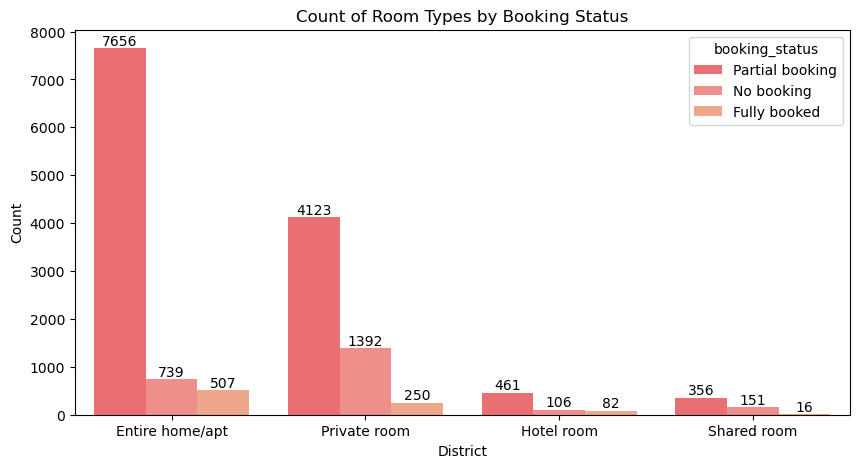

In [89]:
# Bar plot 
plt.figure(figsize=(10, 5))
count_plot = sns.countplot(data = df, x = 'room_type', hue='booking_status')
for container in count_plot.containers:
    count_plot.bar_label(container, label_type='edge')
plt.title('Count of Room Types by Booking Status')
plt.xlabel('District')
plt.ylabel('Count')
plt.show()

**Number of Listings by Duration Type and Booking Status**

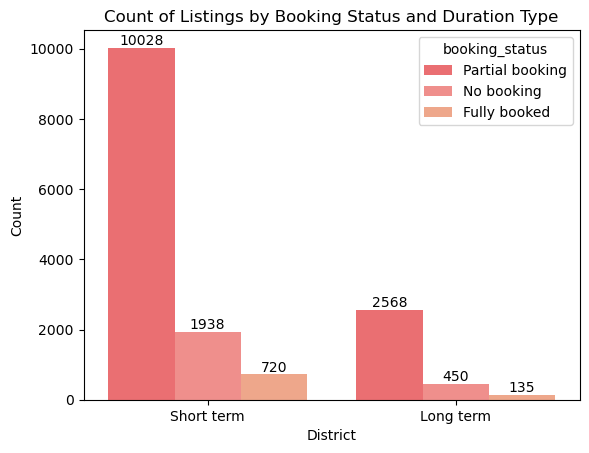

In [90]:
# Bar plot 
count_plot = sns.countplot(data = df, x = 'duration_type', hue='booking_status')
for container in count_plot.containers:
    count_plot.bar_label(container, label_type='edge')
plt.title('Count of Listings by Booking Status and Duration Type')
plt.xlabel('District')
plt.ylabel('Count')
plt.show()

In [91]:
short_booking = df[df['duration_type']=='Short term'].value_counts('booking_status').reset_index()
long_booking = df[df['duration_type']=='Long term'].value_counts('booking_status').reset_index()

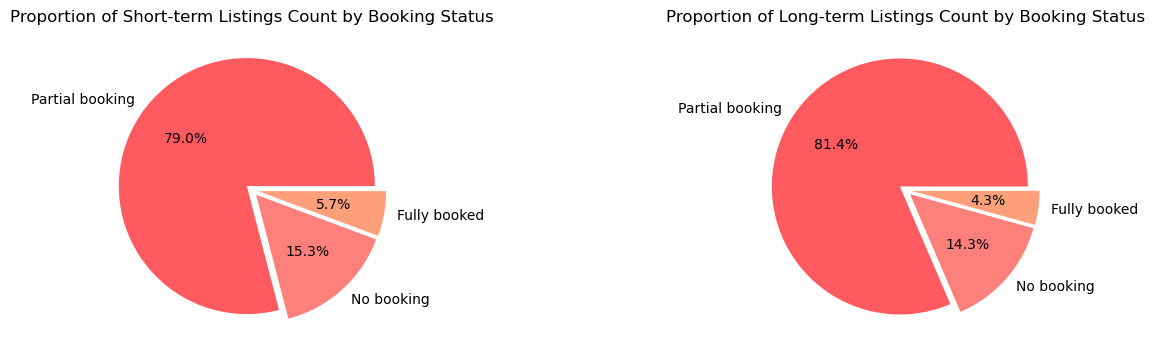

In [92]:
plt.figure(figsize=(14, 4))

# Adjust subplots layout
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4)

# Short term bookings pie chart
plt.subplot(1,2,1)
plt.pie(short_booking['count'], labels=short_booking['booking_status'], autopct='%1.1f%%', explode = [0.05]*len(short_booking))
plt.title('Proportion of Short-term Listings Count by Booking Status')

# Long term bookings pie chart
plt.subplot(1,2,2)
plt.pie(long_booking['count'], labels=long_booking['booking_status'], autopct='%1.1f%%', explode = [0.05]*len(long_booking))
plt.title('Proportion of Long-term Listings Count by Booking Status')

plt.show()

Findings:
- Both short-term and long-term listings have a majority of listings partially booked, with long-term listings having slightly more listings booked.
- 5.7% of short-term listings are fully booked, this suggests that some short-term listings are booked for long-term. While our definition of short-term listing is having the minimum nights for less than 16 days, it does not limit those listings to only short-term guests. 

**Analyzing Bookings by Price**

We want to find out whether the price impacts the booking status. As the price data is not normally distributed, we will use the Kruskal Wallis test.

- **Null Hypothesis (H₀**): There is no significant difference in price across different booking status. 
- **Alternative Hypothesis (H₁)**: There is a significant difference in price across different booking status. 

In [156]:
stat, pval = kruskal(
    df[df['booking_status'] == 'No booking']['price'],
    df[df['booking_status'] == 'Partial booking']['price'],
    df[df['booking_status'] == 'Fully booked']['price']
)

print('p-value:', pval)

if pval < 0.05:
    print('Reject H0. There is a significant difference in price across different booking status.')
else:
    print('Accept H0. No significant difference in price across different booking status.')

p-value: 0.528176282748148
Accept H0. No significant difference in price across different booking status.


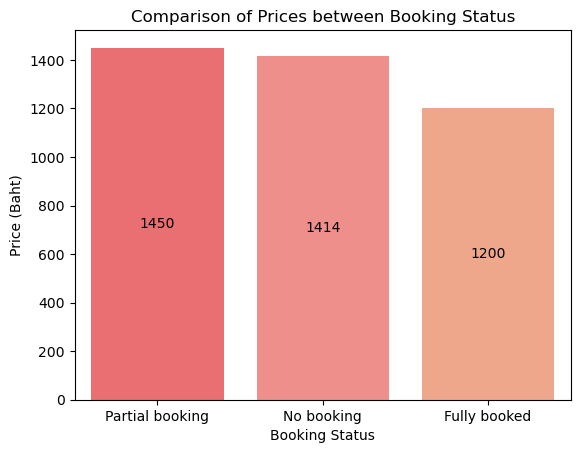

In [94]:
bar_plot = sns.barplot(data = df, x = 'booking_status', y = 'price', estimator = 'median', errorbar=None, hue = 'booking_status')
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='center')
plt.title('Comparison of Prices between Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Price (Baht)')
plt.show()

Findings:
- There is not much difference in price for partial booking and no booking, but listings that are fully booked have slightly lower median price.

### Analyzing Hosts

- Which hosts have the most listings?
- Does the price of a listing vary by the hosts?

In [111]:
# Hosts with only 1 listing
total_hosts = df['host_name'].nunique()
one_listing = len(df[df['calculated_host_listings_count'] == 1])

print(f'Total Number of Hosts: {total_hosts}')
print(f'Hosts with only 1 listing: {one_listing}')

Total Number of Hosts: 5307
Hosts with only 1 listing: 4600


There are a total of 5307 different hosts in Airbnb Bangkok. The majority of hosts only have 1 listing, so we will take a look at the 20 hosts that have the most listings.

In [95]:
# Find top 20 hosts by number of listings
top_host = df.value_counts('host_name').reset_index().head(20)

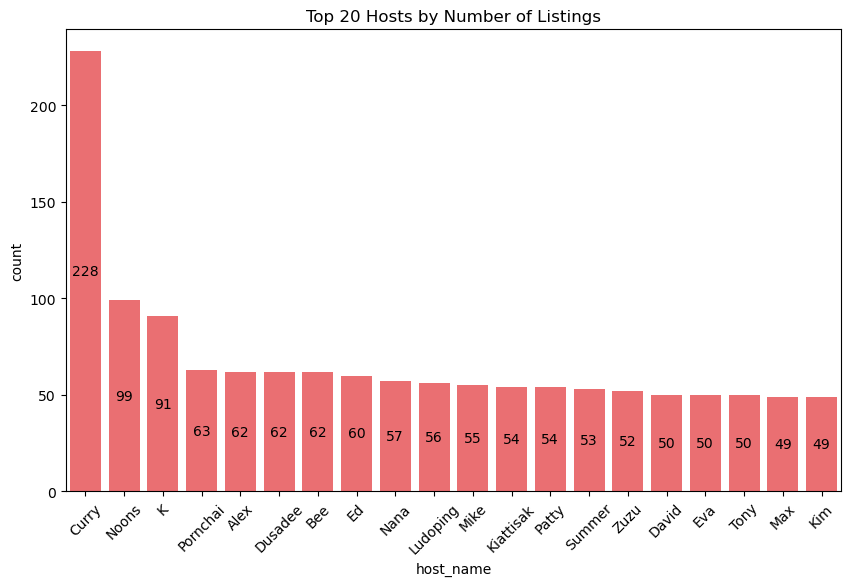

In [112]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_host, x = 'host_name', y='count')
plt.title('Top 20 Hosts by Number of Listings')
ax.tick_params(axis='x', labelrotation=45)
for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.show()

In [177]:
from scipy.stats import kruskal

host_prices = [prices['price'].values for _, prices in df.groupby('host_name')]

stat, pval = kruskal(*host_prices)

print('p-value:', pval)

if pval < 0.05:
    print('Reject Ho. There is a significant difference in price between hosts.')
else:
    print('Accept Ho. No significant difference in price between hosts.')

p-value: 0.0
Reject Ho. There is a significant difference in price between hosts.


Findings:
- There are a total of 5037 different hosts, with the majority of them having only 1 listing. 
- Curry, with 228 total listings, is the host with the most listings. All other top hosts have under 100 listings. 
- From the result of our statistical test, there is a difference in price by different hosts. 

## Conclusion

**District**
- The top 2 districts with the most listings are Watthana and Khlong Toei, both having more than 2000 listings.
- Bang Bon, with only 5 listings, is the district with the least amount of listings.
- The majority of districts have less than 500 listings.
- There is a significant relationship between the location and room  type, suggesting that the number of room type vary by district.
- While for most districts the most common room types are entire homes, some districts have significantly more private rooms such as Phra Nakhon and Don Mueang.
- The district of Phra Nakhon also offers the most shared room, with 131 listings having this room type. This suggests that Phra Nakhon offers many budget options for tourists.

**Room Type**
- The room type with the highest demand is entire home/apt as more than 50% of the listings have this room type. This type of room not only offers privacy but also larger space that allows group travelers to stay together in the same place.
- Private room as the second most popular room type also have a large proportion. This room type offers more privacy than shared rooms, but guests may need to share common space with other guests.
- Hotel rooms and shared rooms are not very popular in Airbnb. There may not be as much hotel listings in Airbnb as there are other platforms for booking hotels. Shared rooms offer less privacy so this may not be the most preferred option.

**Price**
- Price is affected by the district, the closer the district is to the city center, the higher the median price of listings.
- Hotels have the highest median price as hotels offers a wide range of amenities and services.
- Shared rooms are by far the most economical choice, costing less than half of the next option, private rooms. 
- Listings designated for long-term stay have a lower median price than short-term stay.

**Reviews**
- The majority of the listings have been reviewed, but only 14.9% have high reviews (more than 100).  
- Price does significantly affect the number of reviews. Listings with no reviews have a higher median price compared to listings that have been reviewed.
- Watthana and Khlong Toei are the top two districts with the most amount reviews, but also the two districts that have the most amount of listings with no reviews. This means that while they have many popular listings, there are many listings that are still unknown to travelers.
- Only 20.94% of reviews are posted in the last 1 year, meaning most of the reviews are older reviews. 

**Bookings**
- Almost 80% of listings are partially booked, meaning that these listings have active bookings in the next 1 year. 
- 15.1% of listings do not have any booking yet. While this is only a small portion, we need to find a strategy to promote these listings to attract guests.
- Some of the districts that have the most bookings also have the most listings that aren't booked. This may be because these districts are also the districts that have the most total listings so there are some listings that are still not well known. Airbnb can help the hosts of these listings to create a targeted ad to help reach potential customers.
- Bang Bon is the only district that have 100% of their listings not booked. 
- Both short-term and long-term listings have a majority of listings partially booked, with long-term listings having slightly more listings booked.
- The listings that are fully booked have significantly lower median price compared to the other types of booking status 

**Hosts**
- The majority of hosts only have 1 listing in Airbnb.
- The top host with the most listings is Curry with 228 listings. All other hosts have less than 100 listings each.
- Listings from different hosts also differ in price. 

## Recommendation

- Add description of listings in English to attract international guests.
- Optimize listings for entire home/apt as this is the most popular room type for both short and long-term stays. 
- Implement a dynamic pricing model that takes district, room type, and duration type into account. Suggest optimal price to host when based on the characteristic of their property when they register to be host.
- Release a guide highlighting various spots in the districts with the least number of listings to grow interest from visitors. As interest grows, more visitors will want to stay in those districts increasing demand for Airbnb stays in those districts.
- Increase visibility for unpopular listings in high-demand areas through targeted ads or featured listings.
- Prompt guests to leave reviews after their stay through follow-up emails, app notifications, or incentives like discounts on future bookings.